In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load and read data
agrodata = pd.read_excel('Copy of Logistics Role Test Data.xlsx')
agrodata.head()

,Agrodealer_id,Date,Agrodealer Referrals,County,Ward
0,473,2021-03-08,0,Siaya,Ukwala
1,473,2021-03-09,0,Siaya,Ukwala
2,473,2021-03-10,0,Siaya,Ukwala
3,473,2021-03-11,1,Siaya,Ukwala
4,473,2021-03-12,0,Siaya,Ukwala


In [3]:
#set Date as index
agrodata.set_index('Date', inplace = True)
agrodata.head()

,Agrodealer_id,Agrodealer Referrals,County,Ward
Date,,,,
2021-03-08,473,0,Siaya,Ukwala
2021-03-09,473,0,Siaya,Ukwala
2021-03-10,473,0,Siaya,Ukwala
2021-03-11,473,1,Siaya,Ukwala
2021-03-12,473,0,Siaya,Ukwala


# QUESTION 1: TOP 10 DEALERS

In [4]:
# Aggregate the data using aggrodealer_id and sum the referrals
top_10_dealers = agrodata.groupby('Agrodealer_id')['Agrodealer Referrals'].sum().reset_index()
top_10_dealers.set_index('Agrodealer_id', inplace = False)
top_10_dealers.head(10)

,Agrodealer_id,Agrodealer Referrals
0,473,89
1,488,145
2,503,167
3,518,205
4,533,81
5,548,146
6,563,148
7,578,201
8,593,81
9,608,140


In [16]:
#Arrange the data to get the top 10 dealers
top_10_dealers_sorted = top_10_dealers.sort_values(by='Agrodealer Referrals', ascending = False)
A = top_10_dealers_sorted.head(10)
A

,Agrodealer_id,Agrodealer Referrals
15,698,267
19,758,253
11,638,231
3,518,205
7,578,201
10,623,174
2,503,167
13,668,164
14,683,164
17,728,155


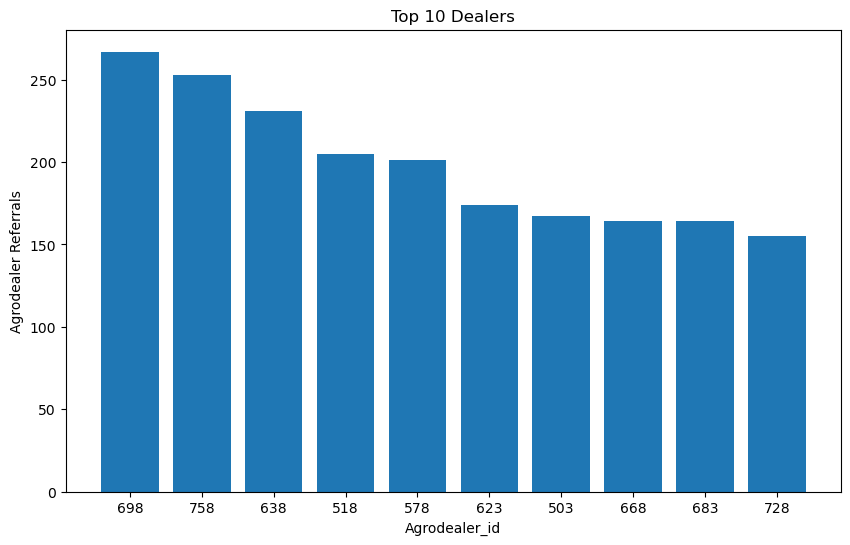

In [6]:
#Plot a bar graph for the top 10 dealers
A['Agrodealer_id'] = A['Agrodealer_id'].astype(str)
plt.figure(figsize = (10, 6))
plt.bar(A['Agrodealer_id'], A['Agrodealer Referrals'])


plt.xlabel('Agrodealer_id')
plt.ylabel('Agrodealer Referrals')
plt.title('Top 10 Dealers')

plt.show() 

In [7]:
print(agrodata.columns)

Index(['Agrodealer_id', 'Agrodealer Referrals', 'County', 'Ward'], dtype='object')


In [8]:
print(agrodata.index)

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-12', '2021-06-13'],
              dtype='datetime64[ns]', name='Date', length=2058, freq=None)


In [9]:
agrodata.reset_index(inplace=True)
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward
0,2021-03-08,473,0,Siaya,Ukwala
1,2021-03-09,473,0,Siaya,Ukwala
2,2021-03-10,473,0,Siaya,Ukwala
3,2021-03-11,473,1,Siaya,Ukwala
4,2021-03-12,473,0,Siaya,Ukwala


# QUESTION 2: BEST WEEKS FOR REFERRALS

In [10]:
#convert the days to weeks and add months
agrodata['Date'] = pd.to_datetime(agrodata['Date'])
agrodata['Month'] = pd.to_datetime(agrodata['Date']).dt.month_name()
agrodata['Week'] = agrodata['Date'].dt.isocalendar().week
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week
0,2021-03-08,473,0,Siaya,Ukwala,March,10
1,2021-03-09,473,0,Siaya,Ukwala,March,10
2,2021-03-10,473,0,Siaya,Ukwala,March,10
3,2021-03-11,473,1,Siaya,Ukwala,March,10
4,2021-03-12,473,0,Siaya,Ukwala,March,10


In [11]:
#Aggregate data using weeks and sort values from largest (question2)
best_weeks = agrodata.groupby(['Week']).agg({'Month': 'first', 'Agrodealer Referrals': 'sum'}).reset_index()
best_weeks_sorted = best_weeks.sort_values(by = 'Agrodealer Referrals', ascending = False)
best_weeks_sorted.set_index('Week', inplace = True)
best_weeks_sorted.head(10)

,Month,Agrodealer Referrals
Week,,
17,April,422
16,April,381
18,May,379
15,April,300
14,April,282
19,May,276
20,May,275
13,March,220
21,May,190


# QUESTION 3: BEST DAY OF THE WEEK

In [12]:
agrodata['Day'] = pd.to_datetime(agrodata['Date']).dt.day_name()
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week,Day
0,2021-03-08,473,0,Siaya,Ukwala,March,10,Monday
1,2021-03-09,473,0,Siaya,Ukwala,March,10,Tuesday
2,2021-03-10,473,0,Siaya,Ukwala,March,10,Wednesday
3,2021-03-11,473,1,Siaya,Ukwala,March,10,Thursday
4,2021-03-12,473,0,Siaya,Ukwala,March,10,Friday


In [22]:
#The best day for referrals (question3)
best_day = agrodata.groupby(['Date', 'Day'])['Agrodealer Referrals'].sum().reset_index()
best_day_sorted = best_day.sort_values(by=['Agrodealer Referrals'], ascending=[False])
best_day_sorted.iloc[0]

Date                    2021-04-30 00:00:00
Day                                  Friday
Agrodealer Referrals                     87
Name: 53, dtype: object

# QUESTION 4: TOP AGENTS CONSISTENT BY WEEK AND BY DAY

In [24]:
agrodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2058 non-null   datetime64[ns]
 1   Agrodealer_id         2058 non-null   int64         
 2   Agrodealer Referrals  2058 non-null   int64         
 3   County                2058 non-null   object        
 4   Ward                  2058 non-null   object        
 5   Month                 2058 non-null   object        
 6   Week                  2058 non-null   UInt32        
 7   Day                   2058 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(4)
memory usage: 122.7+ KB


In [23]:
#removing values that are equal to 0
filtered_df = agrodata[agrodata['Agrodealer Referrals'] != 0]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 3 to 2047
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1392 non-null   datetime64[ns]
 1   Agrodealer_id         1392 non-null   int64         
 2   Agrodealer Referrals  1392 non-null   int64         
 3   County                1392 non-null   object        
 4   Ward                  1392 non-null   object        
 5   Month                 1392 non-null   object        
 6   Week                  1392 non-null   UInt32        
 7   Day                   1392 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(4)
memory usage: 93.8+ KB


In [33]:
top_agents_weekly = filtered_df.groupby(['Week', 'Agrodealer_id'])
top_agents_weekly.head(20)

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week,Day
3,2021-03-11,473,1,Siaya,Ukwala,March,10,Thursday
6,2021-03-14,473,1,Siaya,Ukwala,March,10,Sunday
10,2021-03-18,473,1,Siaya,Ukwala,March,11,Thursday
13,2021-03-21,473,1,Siaya,Ukwala,March,11,Sunday
20,2021-03-28,473,1,Siaya,Ukwala,March,12,Sunday
...,...,...,...,...,...,...,...,...
2041,2021-05-28,773,1,Busia,Bukhayo Central,May,21,Friday
2042,2021-05-29,773,1,Busia,Bukhayo Central,May,21,Saturday
2043,2021-05-30,773,1,Busia,Bukhayo Central,May,21,Sunday
2046,2021-06-02,773,1,Busia,Bukhayo Central,June,22,Wednesday


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

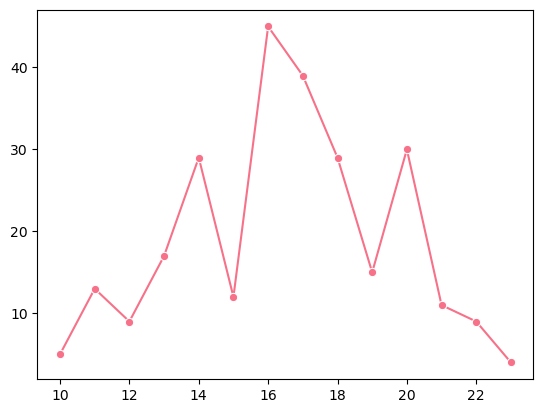

In [15]:
import seaborn as sns

top_agents_weekly['Agrodealer_id'] = top_agents_weekly['Agrodealer_id'].astype(str)

sns.lineplot(x='Week', y='Agrodealer Referrals', hue='Agrodealer_id', data=top_agents_weekly, marker='o')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Agrodealer Referrals')
plt.title('Agrodealer Referrals by Week for Each Agrodealer')

# Show the plot
plt.show()

In [ ]:
#converting date to day
agrodata['Day'] = pd.to_datetime(agrodata['Date']).dt.day_name()
agrodata.head()

In [ ]:
top_agents_daily = agrodata.groupby(['Day', 'Agrodealer_id'])['Agrodealer Referrals'].sum().reset_index()
top_agents_daily = top_agents_daily.sort_values(by='Agrodealer Referrals', ascending= False)
top_agents_daily = top_agents_daily.groupby('Day').head() 
top_agents_daily